In [2]:
import torch
print(torch.__version__)

2.7.0+cu128


In [4]:
torch.cuda.is_available()

True

In [5]:
from urllib import request

In [6]:
url = 'https://pytorch.tips/coffee'
imgname = 'coffee.jpg'
request.urlretrieve(url,imgname)

('coffee.jpg', <http.client.HTTPMessage at 0x24e76aa81d0>)

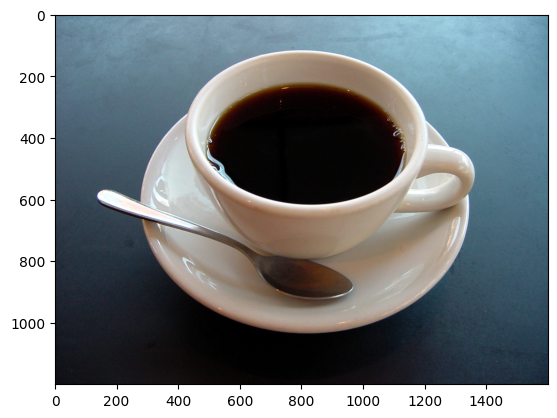

In [9]:
import matplotlib.pyplot as plt
import PIL
img = PIL.Image.open(imgname)
plt.imshow(img)

In [11]:
img.size

(1600, 1200)

In [12]:
## how to add transforms ? 

In [13]:
import torch
from torchvision import transforms

In [23]:
trans_resize = transforms.Resize(256)
trans_crop = transforms.CenterCrop(224)
trans_to_tensor = transforms.ToTensor()
trans_normalize = transforms.Normalize(
    mean = [0,0,0],
    std = [1,1,1]
)

In [24]:
trans_resize(img).size , img.size

((341, 256), (1600, 1200))

In [25]:
trans_crop(img).size,img.size

((224, 224), (1600, 1200))

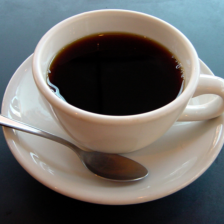

In [27]:
trans_crop(trans_resize(img))

In [28]:
all_tranforms = [trans_resize,trans_crop,trans_to_tensor,trans_normalize]

In [29]:
all_transforms = transforms.Compose(all_tranforms)

In [31]:
img_tensor = all_transforms(img)
img_tensor.shape

torch.Size([3, 224, 224])

In [33]:
#lets use a pretrained net

In [34]:
from torchvision import models

model = models.alexnet(pretrained=True)

D:\code\ML\git_repo_for_ml_learning\python_envs\pytch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\code\ML\git_repo_for_ml_learning\python_envs\pytch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Suraj/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [00:50<00:00, 4.89MB/s]


In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [37]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [38]:
batch = img_tensor.unsqueeze(0)
batch.shape

torch.Size([1, 3, 224, 224])

In [39]:
model.to(device)
out = model(batch.to(device))
print(out.shape)

torch.Size([1, 1000])


In [44]:
ymax,index = torch.max(out,dim=1)

In [46]:
print(ymax,index.item())

tensor([14.7008], device='cuda:0', grad_fn=<MaxBackward0>) 968


In [64]:
#url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a#file-imagenet1000_clsidx_to_labels-txt'
labelpth2 = 'imagenetclasslabel.txt'
with open(labelpth2) as f:
  classes = [line.strip() for line in f.readlines()]

In [66]:
classes[index.item()]

"968: 'cup',"

In [75]:
indices = torch.sort(out,descending=True)
print(type(indices))


<class 'torch.return_types.sort'>


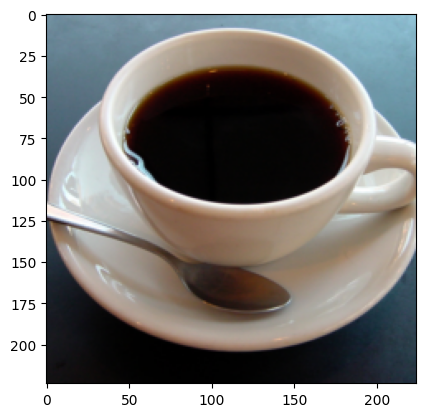

In [93]:
plt.imshow(all_transforms(img).numpy().transpose(1,2,0))

In [99]:
#cup,espresso makes sense 
#mortar ? would be interesting to visualize the latent space to see what features are gettinf activated ? maybe will pickup that paper & implement it :) -> add as a reminder@suraj
#toilet seat ? ... issue is that the confidence seems high as well 

In [103]:
import torch
from torchvision import transforms, models
def e2einference(img,model):
    transform = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225])])
    #normalization has an affect -> we see mortar & toilet seat as predictions with mean 0 , std 1
    img_tensor = transform(img)
    batch = img_tensor.unsqueeze(0)    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()
    model.to(device)
    y = model(batch.to(device))
    
    prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
    _, indices = torch.sort(y, descending=True)
    for idx in indices[0][:5]:
      print(idx.item(),classes[idx], prob[idx].item())
e2einference(img,model)

967 967: 'espresso', 87.97767639160156
968 968: 'cup', 7.700611591339111
504 504: 'coffee mug', 3.86816143989563
925 925: 'consomme', 0.35072243213653564
960 960: 'chocolate sauce, chocolate syrup', 0.05011795461177826
